<a href="https://colab.research.google.com/github/JuanLara18/MNIST-Digit-Classifier-Generator/blob/main/MNIST_Digit_Generation_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección del conjunto de datos

Importamos las librerias necesarias

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

## Selección de los datos

Cargamos la base de datos MNIST

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # Debemos obtener los datos como ndarray

Ajustamos algunas variables de configuración

In [5]:
n_samples = 10000  # Cambia esto al número de muestras que desees usar
n_digits = 10      # Número de dígitos diferentes (0-9)
n_samples_per_digit = n_samples // n_digits
test_size = 0.2    # 20% de los datos para prueba

Generamos un estado aleatorio reproducible

In [6]:
random_state = check_random_state(0)

Obteniendo índices balanceados para un subconjunto de cada dígito

In [7]:
indices = np.arange(len(mnist.target))
target = mnist.target.astype('int64')  # Aseguramos que las etiquetas sean enteros
balanced_indices = []

for digit in range(n_digits):
    digit_indices = indices[target == digit]
    balanced_indices.extend(random_state.choice(digit_indices, n_samples_per_digit, replace=False))

## División de los datos

Creamos el conjunto de datos balanceado

In [8]:
X_balanced = mnist.data[balanced_indices]
y_balanced = mnist.target[balanced_indices]

Dividimos en conjuntos de entrenamiento y prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_size, random_state=random_state
)

Mostramos las dimensiones de los conjuntos de datos para verificación

In [10]:
print(f"Número total de muestras: {n_samples}")
print(f"Muestras por dígito: {n_samples_per_digit}")
print(f"Forma del conjunto de entrenamiento X: {X_train.shape}")
print(f"Forma del conjunto de entrenamiento y: {y_train.shape}")
print(f"Forma del conjunto de prueba X: {X_test.shape}")
print(f"Forma del conjunto de prueba y: {y_test.shape}")

Número total de muestras: 10000
Muestras por dígito: 1000
Forma del conjunto de entrenamiento X: (8000, 784)
Forma del conjunto de entrenamiento y: (8000,)
Forma del conjunto de prueba X: (2000, 784)
Forma del conjunto de prueba y: (2000,)


Lo anterior muestra coherencia con lo buscado:

- **Número total de muestras:** 10000. Esto significa que has seleccionado un total de 10000 imágenes de la base de datos MNIST.
- **Muestras por dígito:** 1000. Como hay 10 dígitos (del 0 al 9), y quieres un conjunto balanceado, esto implica que has seleccionado 1000 imágenes para cada dígito.
- **Forma del conjunto de entrenamiento X:** (8000, 784). Esto muestra que el 80% de tus datos (8000 imágenes) se están utilizando para entrenamiento. Cada imagen está representada por un vector aplanado de 784 píxeles (28x28 píxeles).
- **Forma del conjunto de entrenamiento y:** (8000,). Esto es el vector de etiquetas para las imágenes de entrenamiento; cada número representa la clasificación real del dígito correspondiente a cada imagen.
- **Forma del conjunto de prueba X:** (2000, 784). El 20% restante de tus datos se está utilizando para pruebas, lo que significa que tienes 2000 imágenes para evaluar el modelo.
- Forma del conjunto de prueba y: (2000,). Estas son las etiquetas para las imágenes de prueba.

# Construcción del modelo de clasificación

## Preprocesamiento

Antes de entrenar el modelo, es crucial preparar los datos. Sin embargo, para el algoritmo Naive Bayes y la base de datos MNIST, el preprocesamiento suele ser mínimo dado que las imágenes ya están en escala de grises y normalizadas en tamaño (28x28 píxeles). En este caso, como los datos ya están en un formato adecuado y balanceados, no es necesario realizar un preprocesamiento adicional.

## Modelado

Utilizaremos el algoritmo Gaussian Naive Bayes que supone que la probabilidad de los features sigue una distribución normal.

In [13]:
# Importamos las librerías necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Creamos el modelo de clasificación Naive Bayes
gnb = GaussianNB()

# Entrenamos el modelo utilizando los datos de entrenamiento
gnb.fit(X_train, y_train)

# Predecimos las etiquetas para el conjunto de prueba
y_pred = gnb.predict(X_test)

# Calculamos la precisión comparando las etiquetas reales con las predichas
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo Naive Bayes en el conjunto de prueba es: {accuracy}")

La precisión del modelo Naive Bayes en el conjunto de prueba es: 0.5625


Adicionalmente, podemos obtener las probabilidades de cada clase para una muestra.

Esto nos mostrará un vector con las probabilidades de que la muestra sea de cada dígito (0-9)

In [14]:
probs = gnb.predict_proba(X_test[0:1])
print(f"Probabilidades de clase para la primera muestra del conjunto de prueba:\n{probs}")

Probabilidades de clase para la primera muestra del conjunto de prueba:
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 8.40651476e-117]]


### Comentarios

Tras entrenar y evaluar nuestro modelo Naive Bayes, se obtuvo una precisión del 56.25% en el conjunto de prueba. Aunque esta precisión supera el desempeño de un modelo aleatorio, hay margen significativo para mejorar. Este nivel de precisión indica que, mientras que el modelo puede identificar algunos patrones en los datos para predecir correctamente más de la mitad del tiempo, no capta toda la complejidad de los dígitos manuscritos. Además, el modelo ha mostrado una confianza extrema (100%) en la predicción de la clase de una muestra particular, lo cual es sospechoso y podría ser una señal de overfitting o de que las probabilidades del modelo no reflejan la verdadera incertidumbre de la clasificación. Se sugiere explorar modelos más complejos, realizar ingeniería de características adicionales o recolectar más datos para mejorar la precisión y calibración del modelo.

# Reporte del desempeño

Para el reporte de desempeño, además de la precisión que ya hemos calculado, es importante considerar otras métricas que puedan dar una visión más completa del comportamiento del modelo, especialmente porque la precisión por sí sola no siempre es indicativa del rendimiento en todas las clases en un conjunto de datos balanceado o desbalanceado.

Una métrica comúnmente usada en clasificación multiclase es la matriz de confusión, que muestra las clasificaciones correctas y los tipos de errores cometidos por el modelo. Otras métricas derivadas de la matriz de confusión son el recall (también conocido como sensibilidad), la precisión (no confundir con la exactitud o accuracy en inglés) y el F1-score, que es la media armónica de la precisión y el recall.

El F1-score es particularmente útil cuando se desea encontrar un balance entre la precisión y el recall, y es una buena medida cuando las distribuciones de clase son desiguales. Sin embargo, dado que hemos creado un conjunto de datos balanceado, nos interesa también mirar el score de precisión macro, que calcula la precisión para cada clase y luego toma la media aritmética de estos, dando igual peso a todas las clases, independientemente de su representación en el conjunto de datos.

Aquí está el código para calcular la matriz de confusión, precisión, recall y F1-score para cada dígito, y el score de precisión macro:

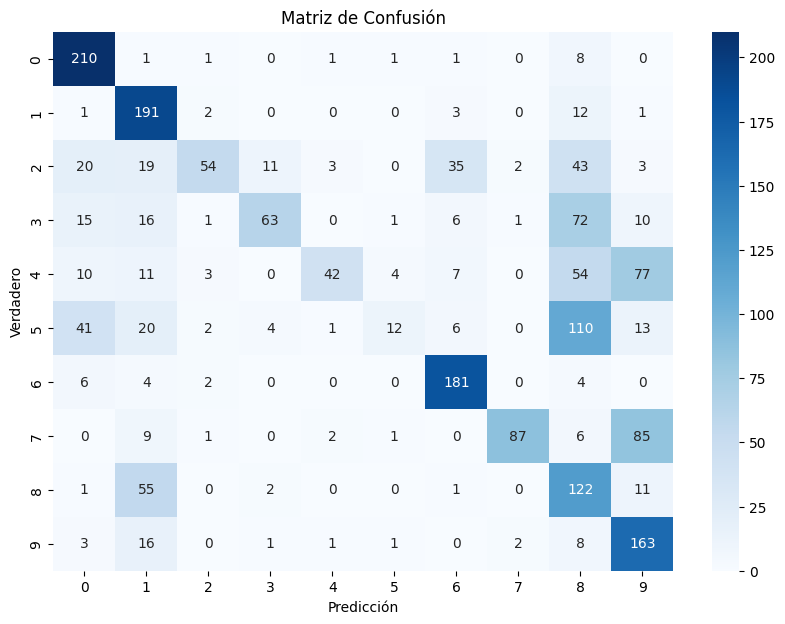

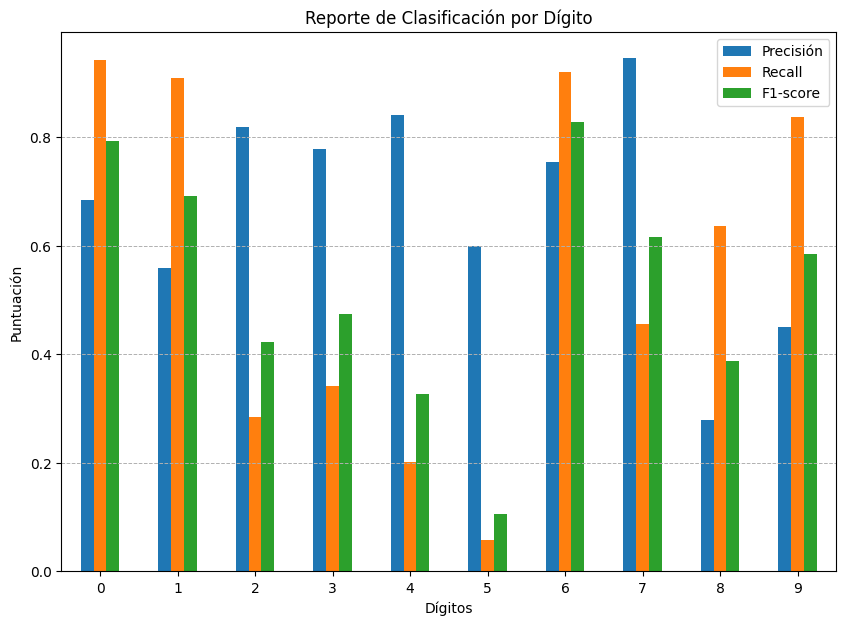


Precisión Macro: 0.6705


In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que `y_test` son las etiquetas verdaderas y `y_pred` son las predicciones del modelo
y_pred = gnb.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mapa de calor para la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

# Calculamos las métricas para cada clase
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Creamos un dataframe para visualizar estas métricas para cada dígito
metrics_df = pd.DataFrame({'Precisión': precision, 'Recall': recall, 'F1-score': f1}, index=range(10))

# Gráfico de barras para el reporte de clasificación
metrics_df.plot(kind='bar', figsize=(10,7))
plt.title('Reporte de Clasificación por Dígito')
plt.xlabel('Dígitos')
plt.ylabel('Puntuación')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Precisión macro
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"\nPrecisión Macro: {precision_macro:.4f}")

Los resultados del modelo Naive Bayes sobre el conjunto de prueba del MNIST reflejan una variabilidad significativa en el desempeño entre las diferentes clases de dígitos.

La matriz de confusión muestra que hay ciertos dígitos, como el '0' y el '6', que tienen tasas altas de clasificación correcta (alto recall), con 210 y 181 verdaderos positivos respectivamente. Esto indica que el modelo es muy bueno para detectar estos dígitos específicos. Por otro lado, hay dígitos como el '5' y el '8' donde el modelo no se desempeña bien, con bajos verdaderos positivos en comparación con los falsos negativos y falsos positivos.

Mirando el reporte de clasificación:

- Los dígitos '0', '1' y '6' tienen altos valores de F1-score, lo que sugiere un buen equilibrio entre precisión y recall. El dígito '0' destaca con un F1-score de 0.7925, indicando un desempeño muy sólido.
- Dígitos como el '2', '3', y '5' muestran F1-scores bajos, lo que implica que el modelo no es tan eficiente para distinguir estas categorías. En particular, el '5' tiene un F1-score de solo 0.1048, resaltando una precisión y un recall muy bajos.
- La precisión macro de 0.6705 indica que, en promedio, el modelo tiene una precisión razonable cuando se ignora el desequilibrio de clase, pero esto no refleja la variabilidad del desempeño entre clases.
- El bajo recall en ciertas clases, como '2', '3', '5', y '8', muestra que hay una cantidad significativa de falsos negativos, lo que significa que el modelo está perdiendo esos dígitos reales al predecir otras clases.


En general, la variabilidad en la precisión y el recall sugiere que el modelo Naive Bayes, aunque es simple y rápido de entrenar, puede no capturar completamente las complejidades de los datos del MNIST. El modelo tiende a funcionar bien en clases donde las características son distintivamente diferentes de las otras clases (como '0' y '6'), pero tiene dificultades con clases donde hay más similitudes o donde la variación dentro de la misma clase es alta (como '8' y '9'). El modelo podría beneficiarse de una representación de características más rica o de un enfoque de modelado más sofisticado.

# Construcción del modelo generativo

Para generar nuevos dígitos, el modelo Naive Bayes no es la mejor herramienta, ya que está diseñado para la clasificación y no para la generación de nuevos ejemplos. En su lugar, podríamos considerar el uso de un modelo generativo, como una red generativa adversaria (GAN) o una red neuronal variacional autoencoder (VAE).

Dicho esto, vamos a simplificar el proceso y tratar de generar un nuevo dígito utilizando el promedio de todos los dígitos en el conjunto de entrenamiento para el dígito específico que queremos generar.

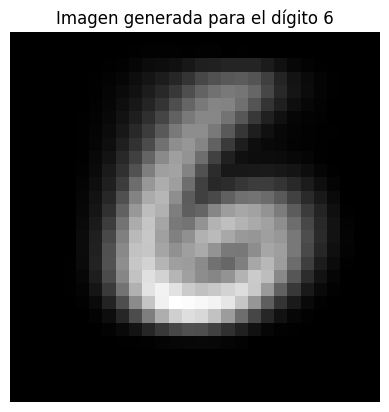

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que X_train contiene las imágenes de entrenamiento y y_train las etiquetas correspondientes.
# Filtramos las imágenes correspondientes al dígito '6'
digit = 6
digit_indices = np.where(y_train == str(digit))[0]
digit_images = X_train[digit_indices]

# Calculamos la imagen promedio
mean_digit_image = np.mean(digit_images, axis=0)

# Visualizamos la imagen promedio
plt.imshow(mean_digit_image.reshape(28, 28), cmap='gray')
plt.title(f'Imagen generada para el dígito {digit}')
plt.axis('off')
plt.show()

En la anterior figura observamos el promedio de todos los ejemplos del dígito "6" lo cual no es muy sofisticado. Con ánimos de realizar algo más sofistifaco usaremos la librería de Keras

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos MNIST
(X_train, _), (_, _) = mnist.load_data()
# Normalizar los datos a -1 a 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)

# Dimensiones del espacio latente (vector de ruido)
latent_dim = 100

# Crear el generador
generator = Sequential()
generator.add(Dense(256, input_dim=latent_dim))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784, activation='tanh'))
generator.add(Reshape((28, 28, 1)))

# Crear el discriminador
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28, 28, 1)))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Crear la GAN combinando ambos
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Función para entrenar la GAN
def train_gan(generator, discriminator, gan, epochs, batch_size=128, save_interval=50):
    for epoch in range(epochs):

        # ---------------------
        #  Entrenar Discriminador
        # ---------------------

        # Seleccionar un batch aleatorio de imágenes
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generar un batch de nuevas imágenes
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)
        gen_imgs = gen_imgs.reshape(batch_size, 28, 28, 1)

        # Entrenar el discriminador (real clasificado como 1 y generado como 0)
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Entrenar Generador
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # El generador quiere que el discriminador etiquete las imágenes falsas como reales
        valid_y = np.array([1] * batch_size)

        # Entrenar el generador
        g_loss = gan.train_on_batch(noise, valid_y)

        # Progreso
        print ("%d [D pérdida: %f, precisión: %.2f%%] [G pérdida: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # Si llega al intervalo de guardado, guardamos imágenes generadas
        if epoch % save_interval == 0:
            save_imgs(generator, epoch)

# Función para guardar las imágenes generadas
def save_imgs(generator, epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Escalar imágenes 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("mnist_%d.png" % epoch)
    plt.close()

# Entrenar la GAN
train_gan(generator, discriminator, gan, epochs=10000, batch_size=32, save_interval=1000)

Se han truncado las últimas 5000 líneas del flujo de salida.
542 [D pérdida: 0.677841, precisión: 59.38%] [G pérdida: 0.778599]
1/1 [==============================] - 0s 25ms/step
543 [D pérdida: 0.683731, precisión: 42.19%] [G pérdida: 0.726810]
1/1 [==============================] - 0s 23ms/step
544 [D pérdida: 0.670881, precisión: 53.12%] [G pérdida: 0.723667]
1/1 [==============================] - 0s 23ms/step
545 [D pérdida: 0.684154, precisión: 46.88%] [G pérdida: 0.694752]
1/1 [==============================] - 0s 23ms/step
546 [D pérdida: 0.653575, precisión: 51.56%] [G pérdida: 0.698222]
1/1 [==============================] - 0s 23ms/step
547 [D pérdida: 0.677147, precisión: 45.31%] [G pérdida: 0.690854]
1/1 [==============================] - 0s 23ms/step
548 [D pérdida: 0.680847, precisión: 59.38%] [G pérdida: 0.694852]
1/1 [==============================] - 0s 24ms/step
549 [D pérdida: 0.628744, precisión: 65.62%] [G pérdida: 0.698920]
1/1 [==============================] - 